# Running CPM on a Southern, bright M dwarf target.

In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
from astropy.wcs import WCS
import pandas as pd
import glob

plt.rcParams["figure.figsize"] = (14, 10)

import tess_rotation as tr

In [ ]:
ticid = 150428135
# ticid = 167721744

In [2]:
path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_97.0967865903209_-65.5793115481931_68x68px"  

In [169]:
sectors = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]
collims = [[33, 35], [33, 35], [33, 35], [33, 35], [32, 34], [33, 35], [33, 35], [33, 35], [33, 36], [34, 36], [33, 35]]
rowlims = [[33, 35], [33, 35], [33, 35], [33, 35], [32, 34], [33, 35], [32, 34], [32, 34], [32, 35], [33, 35], [32, 35]]
# collims = [collims1, collims2, collims3, collims4, collims5, collims6, collims7, collims8, collims9, collims10, collims11]
# rowlims = [rowlims1, rowlims2, rowlims3, rowlims4, rowlims5, rowlims6, rowlims7, rowlims8, rowlims9, rowlims10, rowlims11]

df = pd.DataFrame(dict({"sectors": sectors,
                        "collims": collims,
                        "rowlims": rowlims}))
df.to_csv("150428135_aperture.csv")

df_reload = pd.read_csv("150428135_aperture.csv")
df

# print(len(sectors), len(collims), len(rowlims))

sectors   collims   rowlims
0         1  [33, 35]  [33, 35]
1         3  [33, 35]  [33, 35]
2         4  [33, 35]  [33, 35]
3         5  [33, 35]  [33, 35]
4         6  [32, 34]  [32, 34]
5         7  [33, 35]  [33, 35]
6         8  [33, 35]  [32, 34]
7         9  [33, 35]  [32, 34]
8        10  [33, 36]  [32, 35]
9        11  [34, 36]  [33, 35]
10       13  [33, 35]  [32, 35]

In [122]:
# sector_ind = 0
# fits_files1 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[sector_ind]).zfill(2)))[0]  
# collims1, rowlims1 = tr.select_aperture(sectors[sector_ind], [33, 35], [33, 35], fits_files1, plot=False)

# sector_ind = 1
# fits_files2 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[sector_ind]).zfill(2)))[0]  
# collims2, rowlims2 = tr.select_aperture(sectors[sector_ind], [33, 35], [33, 35], fits_files2, plot=False)

# sector_ind = 2
# fits_files3 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[sector_ind]).zfill(2)))[0]  
# collims3, rowlims3 = tr.select_aperture(sectors[sector_ind], [33, 35], [33, 35], fits_files3, plot=False)

# sector_ind = 3
# fits_files4 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[sector_ind]).zfill(2)))[0]  
# collims4, rowlims4 = tr.select_aperture(sectors[sector_ind], [33, 35], [33, 35], fits_files4, plot=False)

# sector_ind = 4
# fits_files5 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[sector_ind]).zfill(2)))[0]  
# collims5, rowlims5 = tr.select_aperture(sectors[sector_ind], [32, 34], [32, 34], fits_files5, plot=False)

# sector_ind = 5
# fits_files6 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[sector_ind]).zfill(2)))[0]  
# collims6, rowlims6 = tr.select_aperture(sectors[sector_ind], [33, 35], [33, 35], fits_files6, plot=False)

# sector_ind = 6
# fits_files7 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[sector_ind]).zfill(2)))[0]  
# collims7, rowlims7 = tr.select_aperture(sectors[sector_ind], [33, 35], [32, 34], fits_files7, plot=False)

# fits_files8 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[7]).zfill(2)))[0]  
# collims8, rowlims8 = tr.select_aperture(sectors[7], [33, 35], [32, 34], fits_files8, plot=True)

# fits_files9 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[8]).zfill(2)))[0]  
# collims9, rowlims9 = tr.select_aperture(sectors[7], [33, 36], [32, 35], fits_files9, plot=True)

# fits_files10 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[9]).zfill(2)))[0]  
# collims10, rowlims10 = tr.select_aperture(sectors[7], [34, 36], [33, 35], fits_files10, plot=True)

# fits_files11 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[10]).zfill(2)))[0]  
# collims11, rowlims11 = tr.select_aperture(sectors[7], [33, 35], [32, 35], fits_files11, plot=True)

In [136]:
x, y = [], []
for i in range(len(sectors)):
    fits_files = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[i]).zfill(2)))[0]  
    _x, _y = tr.make_lc_single_sector(sectors[i], collims[i], rowlims[i], fits_files, plot=False, save_to_file=False)
    x.append(_x)
    y.append(_y)

x = np.array([i for j in x for i in j])
y = np.array([i for j in y for i in j])

Removing 15 bad data points (out of 1282) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Removing 13 bad data points (out of 1288) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Removing 14 bad data points (out of 1060) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Removing 23 bad data points (out of 1196) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Removing 6 bad data points (out of 993) using the TESS provided QUALITY array
Summing ov

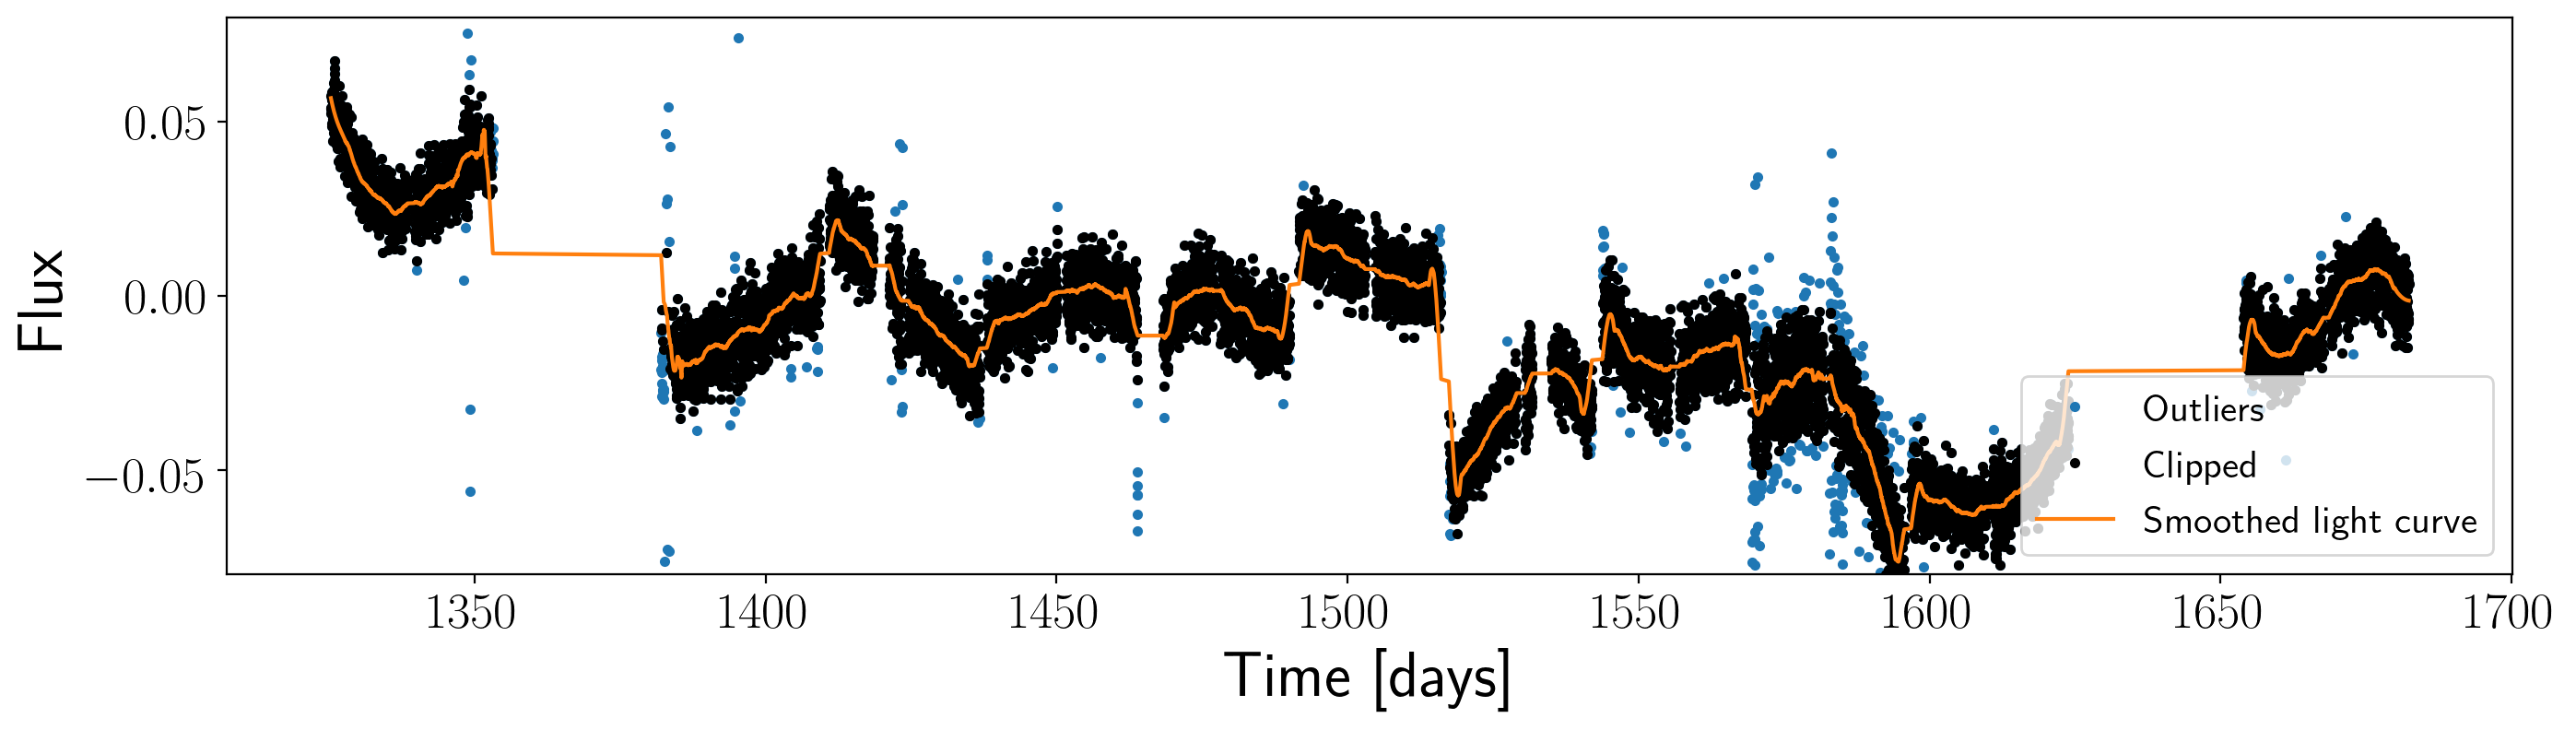

In [137]:
import starspot as ss

# Do an initial sigma clip to remove big outliers.
m = ss.sigma_clip(y, nsigma=6)
t, f = x[m], y[m]

# Then a sigma clip using a Sav-Gol filter for smoothing
mask, smooth = ss.filter_sigma_clip(t, f, window_length=199)

time, flux = t[mask], f[mask]

plt.figure(figsize=(16, 4), dpi=200)
plt.plot(x, y, ".", label="Outliers")
plt.plot(time, flux, "k.", label="Clipped")
plt.plot(t, smooth, label="Smoothed light curve")
plt.xlabel("Time [days]")
plt.ylabel("Flux");
plt.ylim(-.08, .08);
plt.legend(loc="lower right", fontsize=15);

0.006295767899383528


<ErrorbarContainer object of 3 artists>

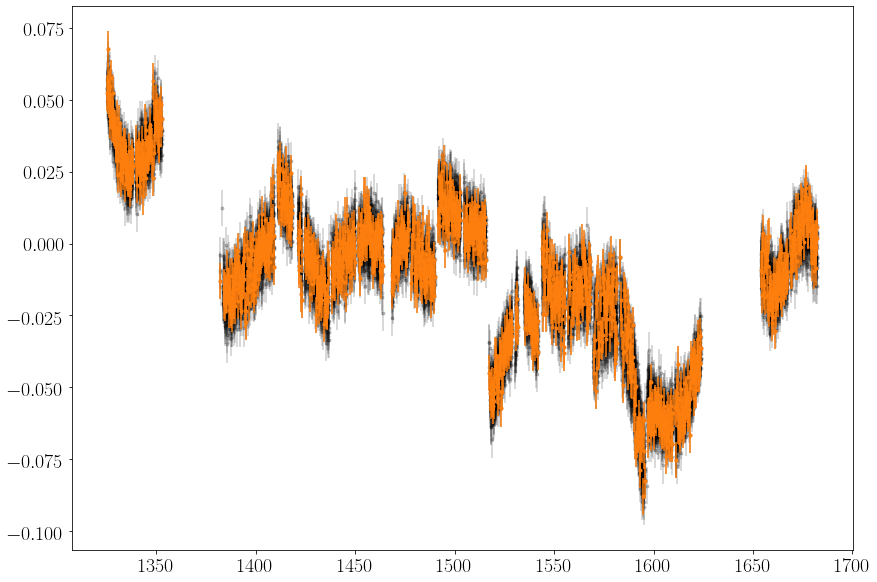

In [156]:
import astropy.stats as aps

flux_err = np.ones_like(flux) * 1.5*aps.median_absolute_deviation(f - smooth)
ferr = np.ones_like(t) * 1.5*aps.median_absolute_deviation(f - smooth)
print(flux_err[0])

# plt.errorbar(t, f-smooth, yerr=ferr, fmt="k.", alpha=.2)
plt.errorbar(time, flux, yerr=flux_err, fmt="k.", alpha=.2, zorder=0)

cut, sub = len(time), 10
x, y, yerr = time[:cut:sub], flux[:cut:sub], flux_err[:cut:sub]
plt.errorbar(x, y, yerr=yerr, fmt="C1.", alpha=1, zorder=1)

[1325.29278 1354.10102 1382.03987 1410.89974 1437.82566 1468.26998
 1491.62553 1517.3415  1543.7508  1569.43176 1596.77203 1624.94979
 1653.91505]


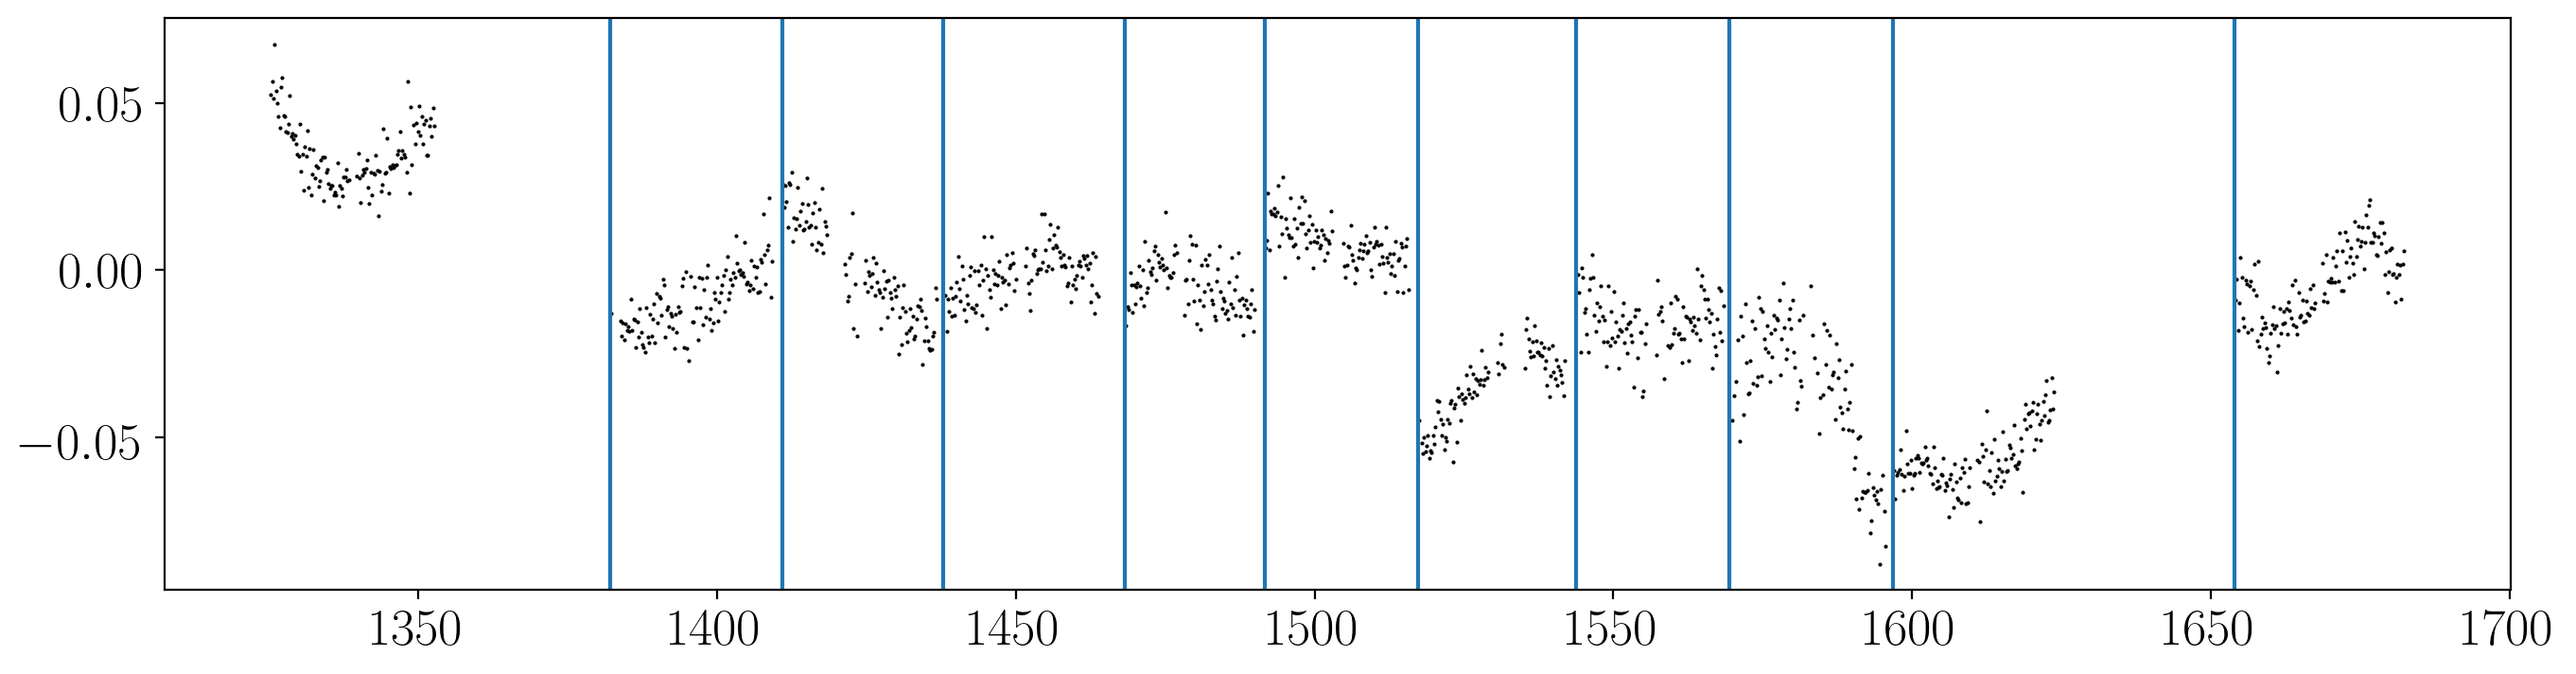

In [157]:
sector_times = pd.read_csv("sector_times.csv")

plt.figure(figsize=(16, 4), dpi=200)
plt.plot(x, y, "k.", ms=1)

m = (sector_times.event == "start")
starts = sector_times.TJD.values[m]
print(starts)
gap_times = list(starts)
gap_times.pop(0)
gap_times.pop(0)
gap_times.pop(-2)
gap_times = gap_times[:11]
for t in gap_times:
    plt.axvline(t)

In [158]:
steps = np.zeros(len(gap_times))
star = ss.StitchModel(x, np.ascontiguousarray(y, dtype=np.float64), yerr, gap_times, steps, 2.0)

In [160]:
star.model_offsets()
map_soln = star.find_optimum()
mu_gp, var = star.evaluate_model(x)

optimizing logp for variables: [step10, step9, step8, step7, step6, step5, step4, step3, step2, step1, logrho, logsigma]
126it [00:00, 729.47it/s, logp=4.345068e+03]
message: Desired error not necessarily achieved due to precision loss.
logp: 515.2369754711409 -> 4345.067836239879


Text(0, 0.5, 'Flux')

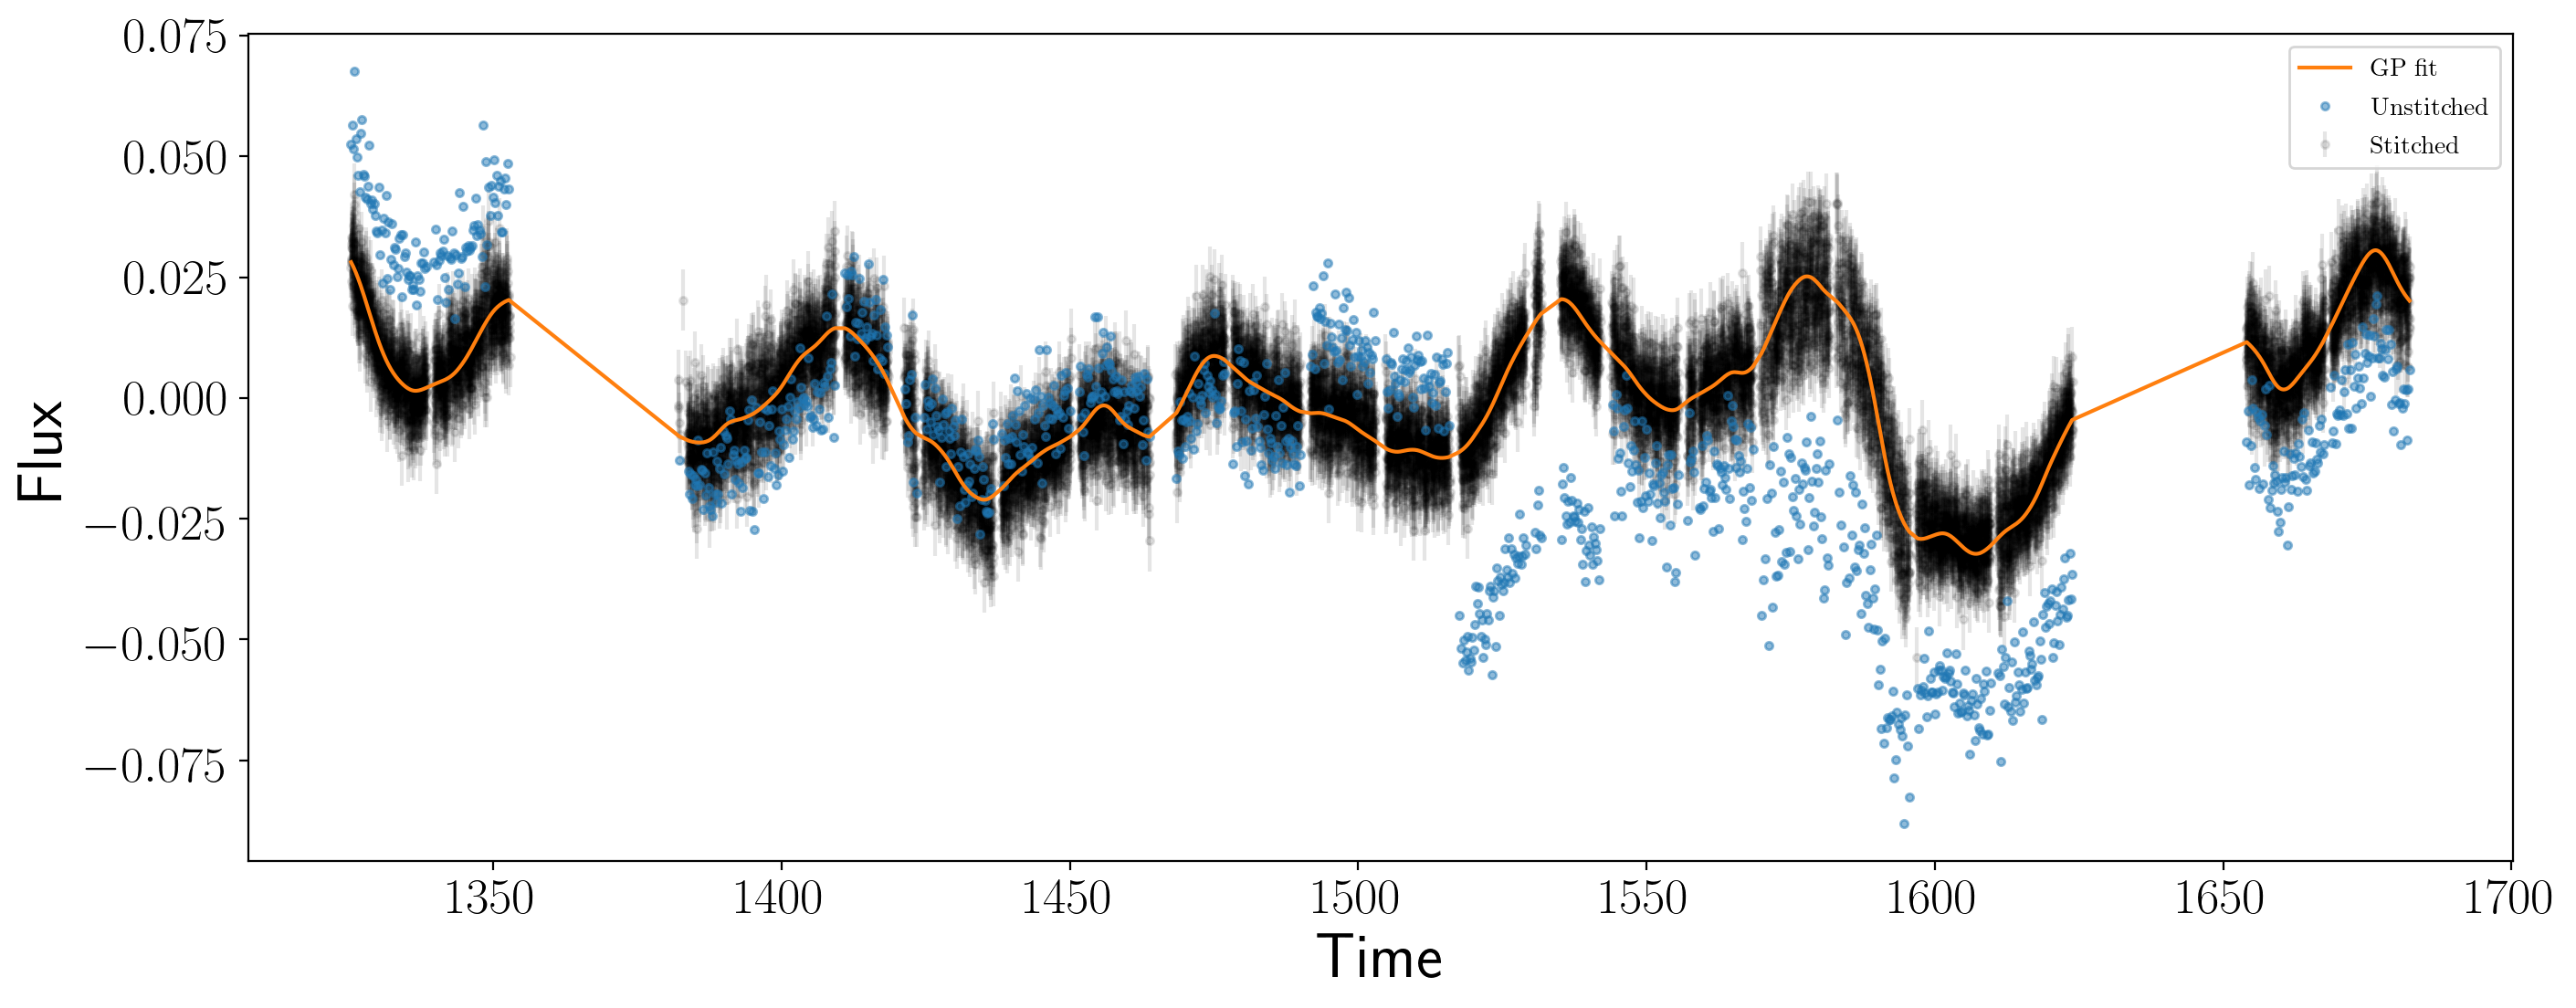

In [166]:
best_steps = []
for i in range(len(steps)):
    best_steps.append(float(map_soln[0][f"step{i+1}"]))

stitched = y - ss.step_model(x, gap_times, best_steps)
full_stitched = flux - ss.step_model(time, gap_times, best_steps)
w_full = np.polyfit(time, full_stitched, 1)
w = np.polyfit(x, stitched, 1)

plt.figure(figsize=(16, 6), dpi=200)
plt.plot(x, mu_gp - np.polyval(w, x), zorder=2, color="C1", label="$\mathrm{GP~fit}$")
plt.plot(x, y, "C0.", alpha=.5, zorder=1, label="$\mathrm{Unstitched}$")
plt.errorbar(time, full_stitched-np.polyval(w_full, time), yerr=flux_err, fmt="k.", alpha=.1, zorder=0, label="$\mathrm{Stitched}$")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Flux")

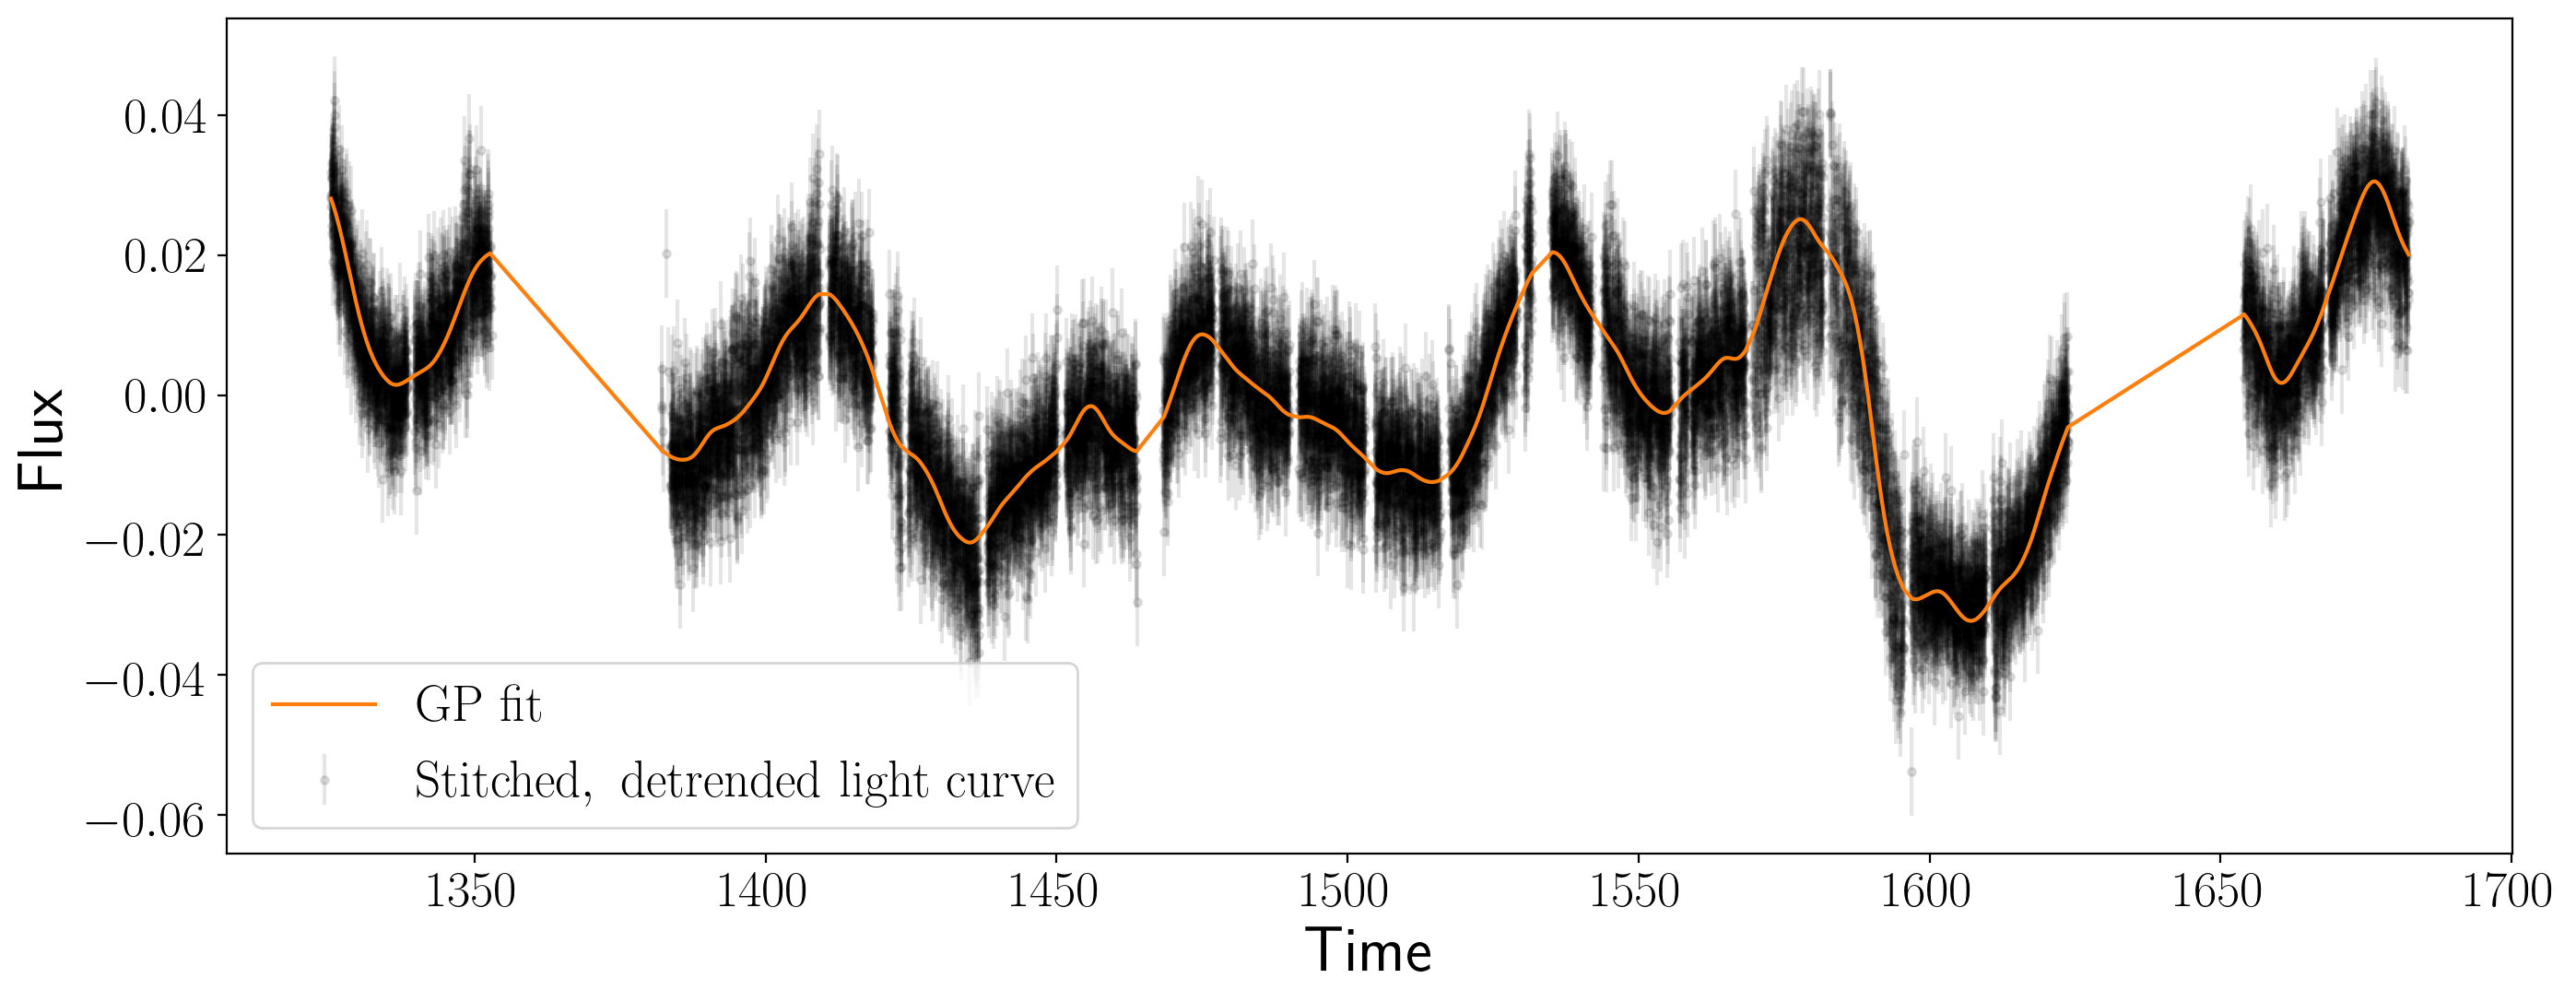

In [173]:
plt.figure(figsize=(16, 6), dpi=200)
plt.plot(x, mu_gp - np.polyval(w, x), zorder=2, color="C1", label="$\mathrm{GP~fit}$")
plt.errorbar(time, full_stitched-np.polyval(w_full, time), yerr=flux_err, fmt="k.", alpha=.1, zorder=0,
             label="$\mathrm{Stitched,~detrended~light~curve}$")
plt.legend(fontsize=20)
plt.xlabel("Time")
plt.ylabel("Flux")
plt.savefig("150428135_lc")

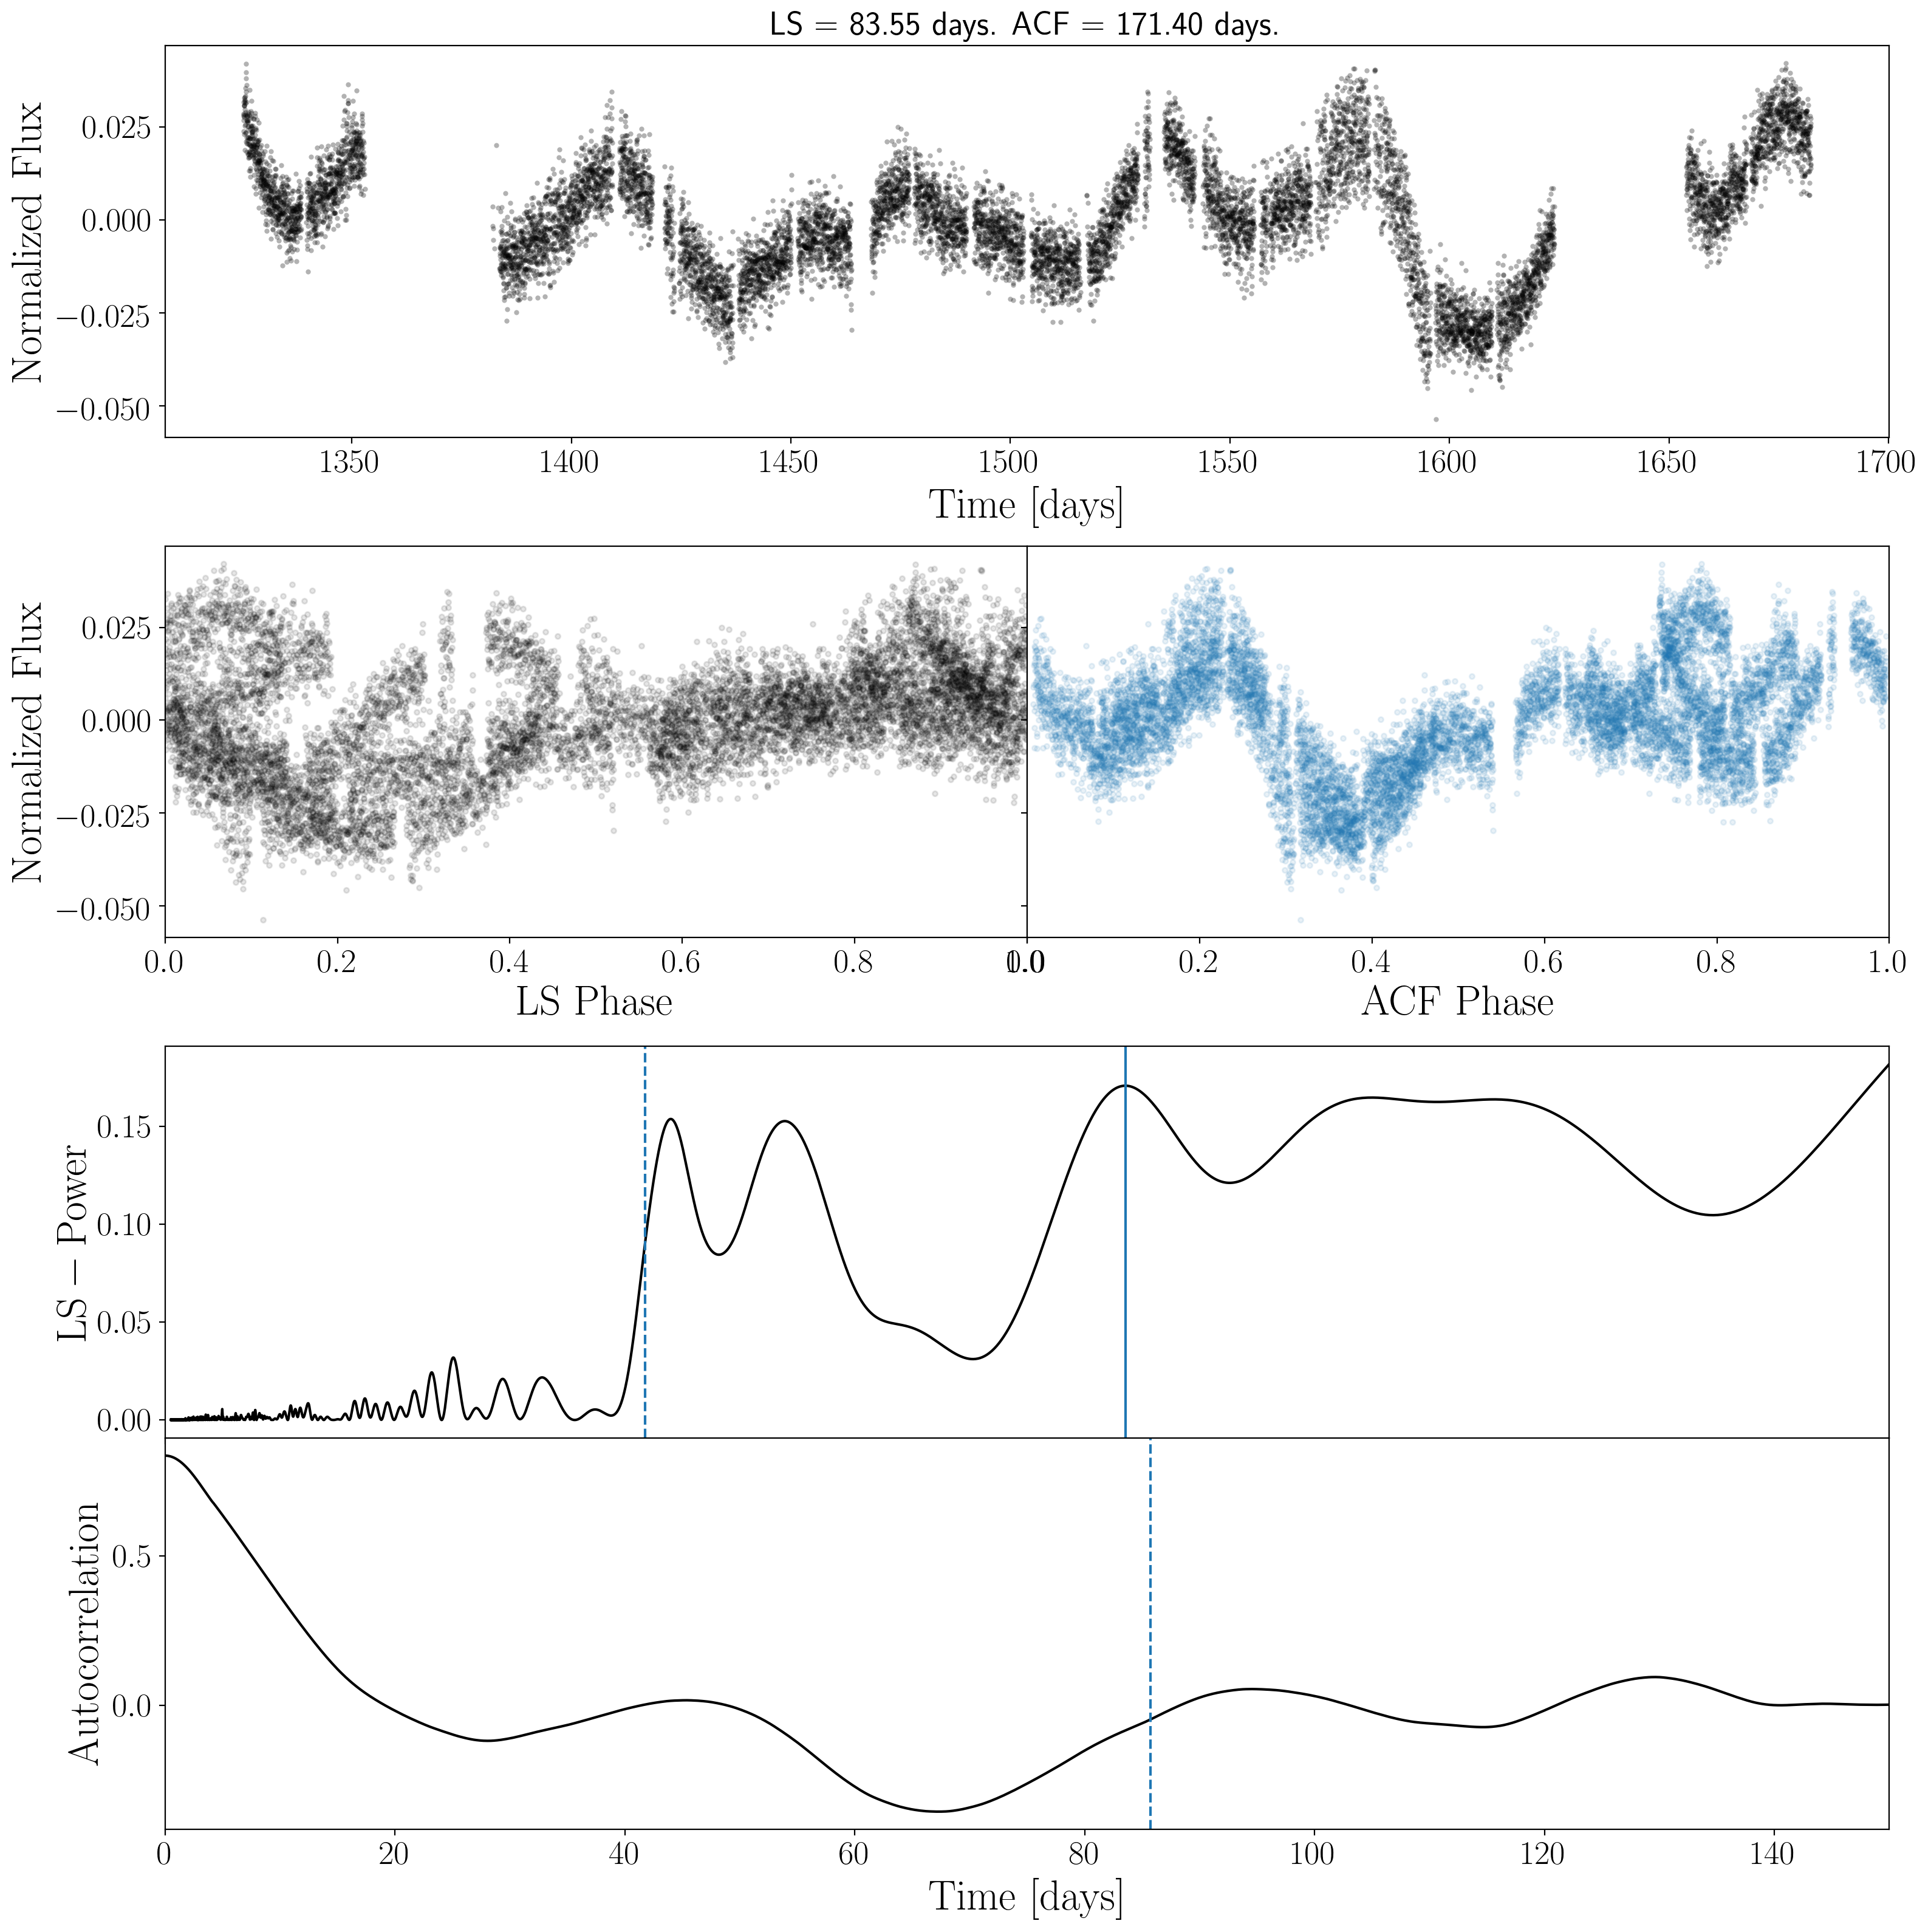

In [167]:
star = ss.RotationModel(time, full_stitched-np.polyval(w, time), flux_err)
ls_period = star.ls_rotation(max_period=150)
acf_period = star.acf_rotation(interval="TESS", window_length=5999)
# period_grid = np.linspace(50, 150, 1000)
# pdm_period = star.pdm_rotation(period_grid)
star.big_plot(["ls", "acf"], method_xlim=(0, 150));